# Preparing Time Series Data
Like most preparation processes, but now with dates!

In [2]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import user, password, host
import os
# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import prepare

## Acquire
We'll start by loading up the data from mysql server.

In [4]:
# The following are functions contained in the accompanying acquire.py file

def get_db_url(database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand 
    database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

def prep_sales_data(df):
    df['sale_date'] = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    return df

def create_new_columns(df):
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    return df

def wrangle_store_data():
    filename = 'tsa_item_demand.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_store_data()
        
    df = prep_sales_data(df)
    df = create_new_columns(df)
    
    return df

def get_plot_sales_amount_and_prices(df):
    df.groupby('sale_date').sale_amount.sum().plot()
    plt.title('Sales at every store over time')
    plt.show()
    
    df.groupby('item_id').item_price.mean().plot()
    plt.title('Price for each item')
    plt.show()

In [5]:
df = wrangle_store_data()

In [6]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_amount    913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_zipcode  913000 non-null  int64  
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  month          913000 non-null  object 
 14  day_of_week    913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 118.4+ MB

# 1. Convert date column to datetime format.

In [6]:
# df['sale_date'] = pd.to_datetime(df.sale_date)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   item_upc14     913000 non-null  int64  
 3   item_upc12     913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   sale_id        913000 non-null  int64  
 8   sale_amount    913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_zipcode  913000 non-null  int64  
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  month          913000 non-null  object 
 14  day_of_week    913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 118.4+ MB

# 3. Set the index to be the datetime variable.

In [8]:
# df = df.set_index('sale_date').sort_index()

In [9]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


# 2. Plot the distribution of sale_amount and item_price.

In [10]:
df.groupby('sale_date').sale_amount.sum()

sale_date
2013-01-01    13696
2013-01-02    13678
2013-01-03    14488
2013-01-04    15677
2013-01-05    16237
              ...  
2017-12-27    20378
2017-12-28    21885
2017-12-29    23535
2017-12-30    24988
2017-12-31    26420
Name: sale_amount, Length: 1826, dtype: int64

# 2. Plot the distribution of sale_amount and item_price.

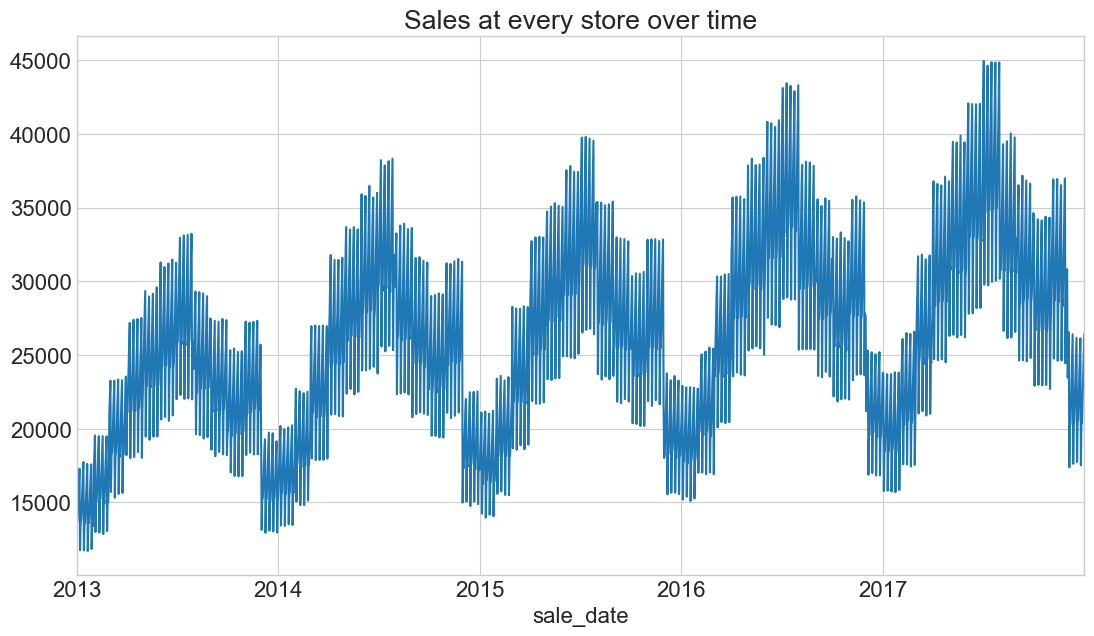

In [11]:
df.groupby('sale_date').sale_amount.sum().plot()
plt.title('Sales at every store over time')
plt.show()

In [12]:
# check if each item has only 1 price across all times and stores
(df.groupby('item_id').item_price.nunique() != 1).sum() == 0

True

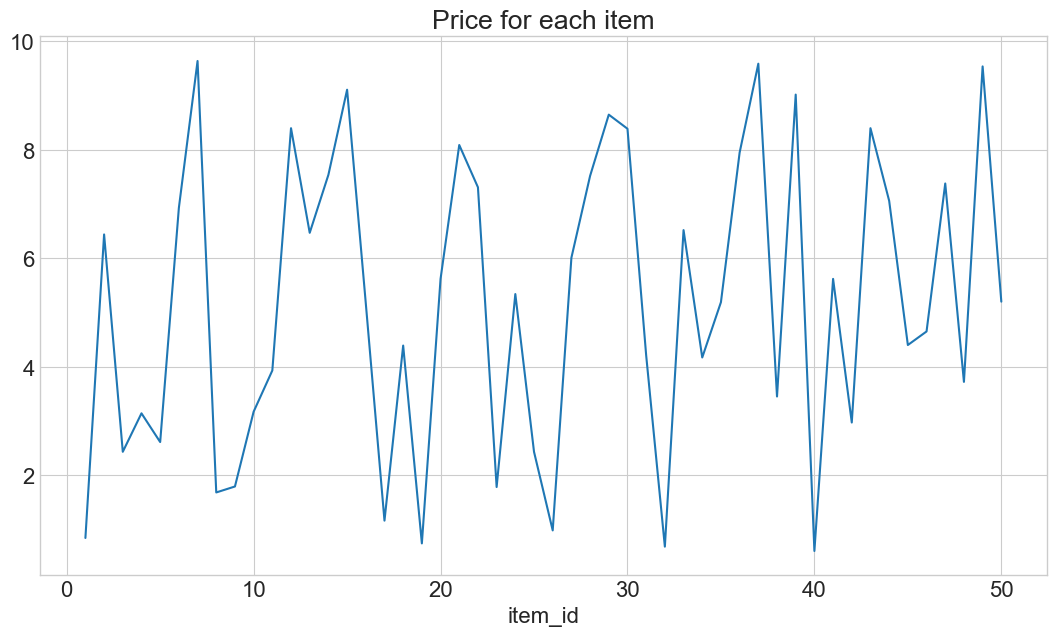

In [13]:
df.groupby('item_id').item_price.mean().plot()
plt.title('Price for each item')
plt.show()

# 4. Add a 'month' and 'day of week' column to your dataframe.

In [14]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [15]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


# 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [16]:
df['sales_total'] = df.sale_amount * df.item_price

In [17]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [18]:
def prep_sales_data(df):
    df['sale_date'] = pd.to_datetime(df.sale_date)
    df = df.set_index('sale_date').sort_index()
    return df

In [19]:
def get_plot_sales_amount_and_prices(df):
    df.groupby('sale_date').sale_amount.sum().plot()
    plt.title('Sales at every store over time')
    plt.show()
    
    df.groupby('item_id').item_price.mean().plot()
    plt.title('Price for each item')
    plt.show()

In [20]:
def create_new_columns(df):
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [21]:
df2 = prepare.wrangle_store_data()

In [22]:
df2.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,25.16


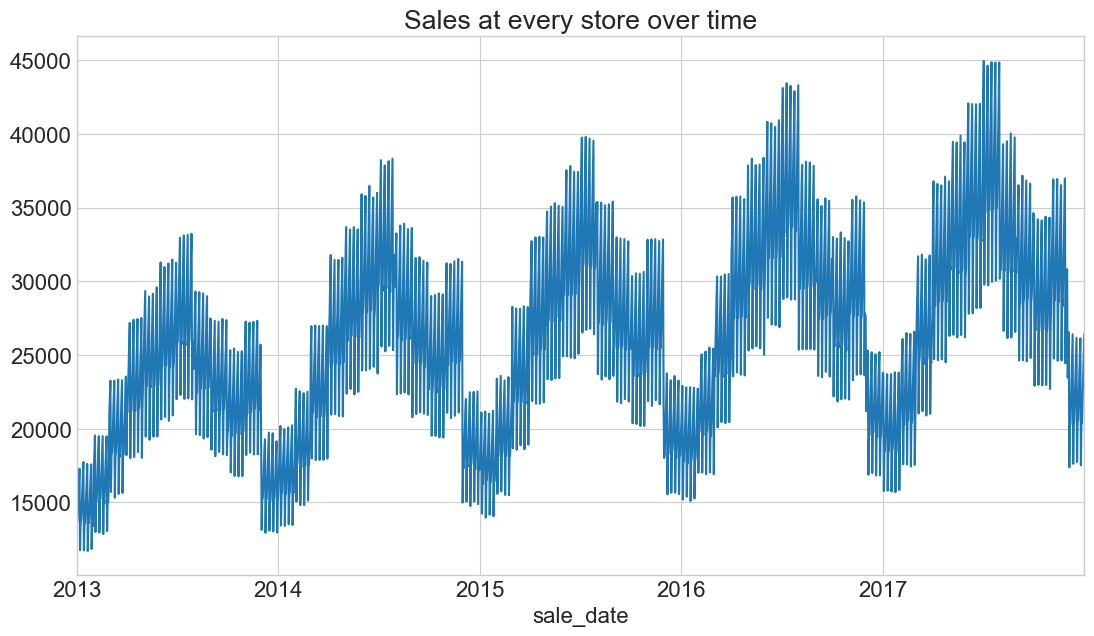

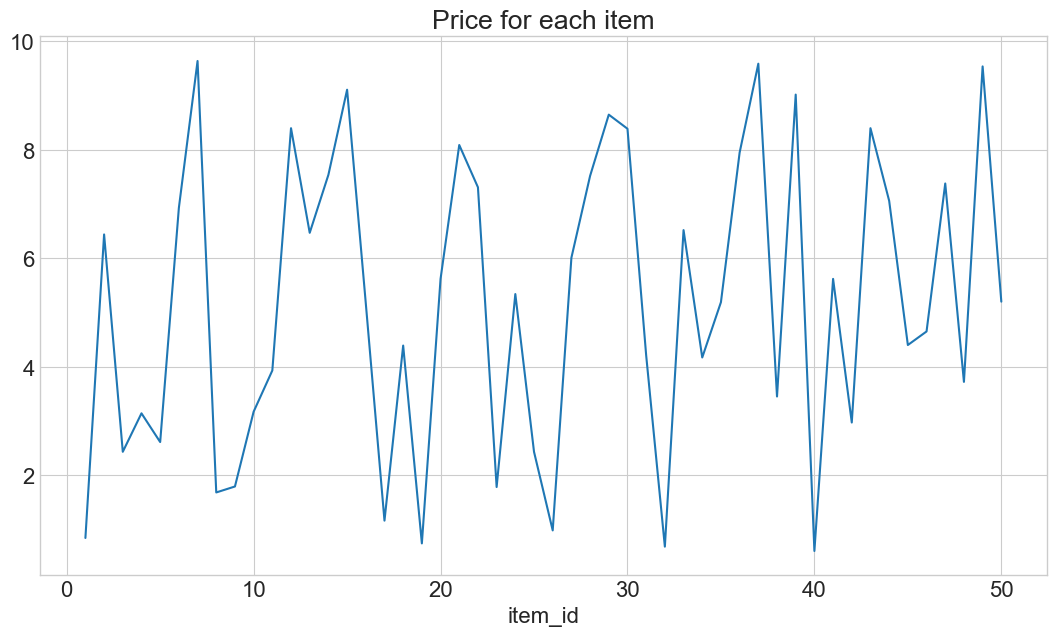

In [23]:
prepare.get_plot_sales_amount_and_prices(df2)

In [14]:
def split_time_data(df):
    '''
    This function will split a time series dataset into train and test sets,
    and return the split dataframes
    '''
    # get the index value at 80%
    split_index = round(len(df) * .8)
    # train will be 80% of the length of the original df, test will be the remaining
    train = df.iloc[:split_index]
    test = df.iloc[split_index:]
    # return the split dfs
    return train, test

In [15]:
train, test = split_time_data(df)

In [12]:
split_index = round(len(df) * .8)

In [13]:
split_index

730400

In [16]:
train.shape, test.shape

((730400, 16), (182600, 16))

# Part 2

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [24]:
import acquire

In [25]:
germany = acquire.get_germany()

In [26]:
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


# 1. Convert date column to datetime format.

In [27]:
germany.Date = pd.to_datetime(germany.Date)

# 3. Set the index to be the datetime variable.

In [28]:
germany = germany.set_index(germany.Date).sort_index().drop(columns='Date')

# 2. Plot the distribution of each of your variables.

In [29]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


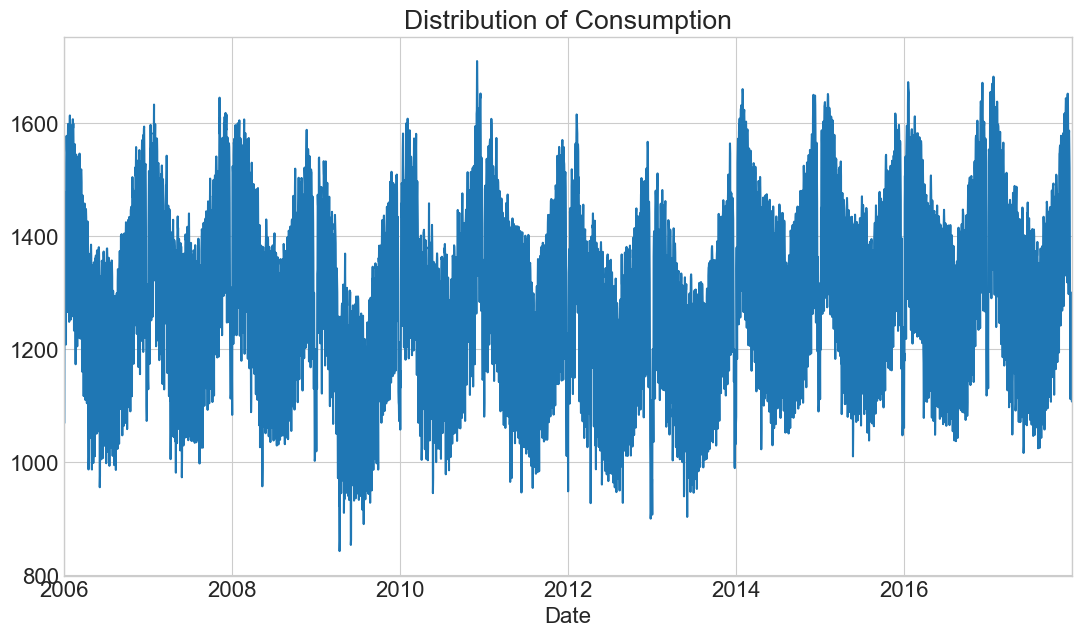

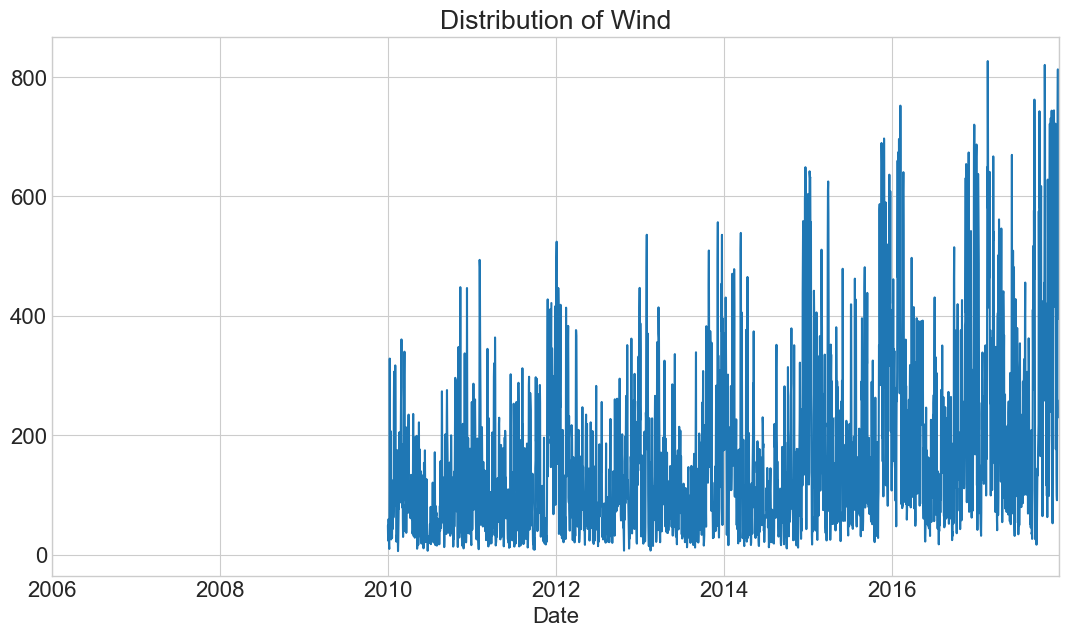

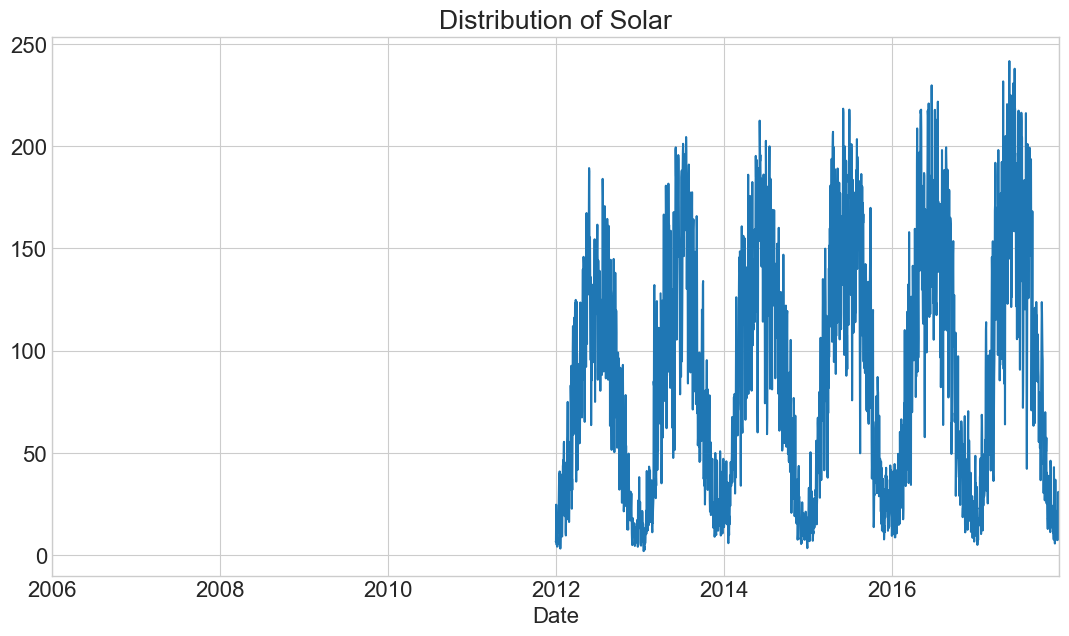

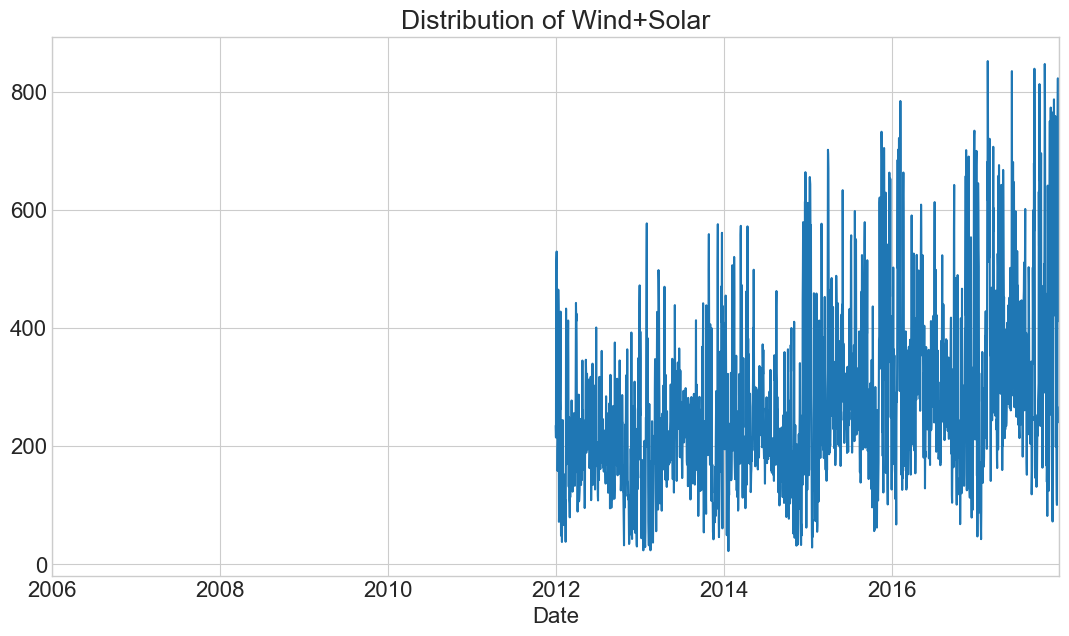

In [30]:
for col in germany.columns:
    germany[col].plot()
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Add a month and a year column to your dataframe.

In [31]:
germany['month'] = germany.index.month_name()
germany['year'] = germany.index.year

In [32]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


# 5. Fill any missing values.

In [33]:
germany = germany.fillna(0)

# 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [34]:
germany.columns = germany.columns.str.lower().to_list()

In [35]:
germany.head()

,consumption,wind,solar,wind+solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [36]:
def prep_germany(df):
    '''
    This function will lowercase all column names, convert the date column to datetime
    set date as the index, create new columns for month and year, 
    the fill nulls with 0
    
    returns prepped DataFrame
    '''
    # set column names to lowercase
    df.columns = df.columns.str.lower().to_list()
    # convert date to datetime and set as index
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date).sort_index().drop(columns='date')
    # create new columns for month and year
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    # fill null values with 0
    df = df.fillna(0)
    # return prepped dataFrame
    return df

In [37]:
germany.columns[(germany.dtypes != 'O')]

Index(['consumption', 'wind', 'solar', 'wind+solar', 'year'], dtype='object')

In [38]:
not_object = germany.columns[germany.dtypes != 'O'].to_list()

In [39]:
not_object

['consumption', 'wind', 'solar', 'wind+solar', 'year']

In [40]:
def plot_distributions(df):
    '''
    This function will plot distributions of all columns in the dataframe
    '''
    not_object = df.columns[df.dtypes != 'O'].to_list()
    for col in not_object:
        df[col].plot()
        plt.title(f'Distribution of {col}')
        plt.show()

In [41]:
def wrangle_germany():
    '''
    this will acquire and prepare the germany dataset
    '''
    germany = prep_germany(acquire.get_germany())
    return germany

In [42]:
germany2 = prepare.wrangle_germany()

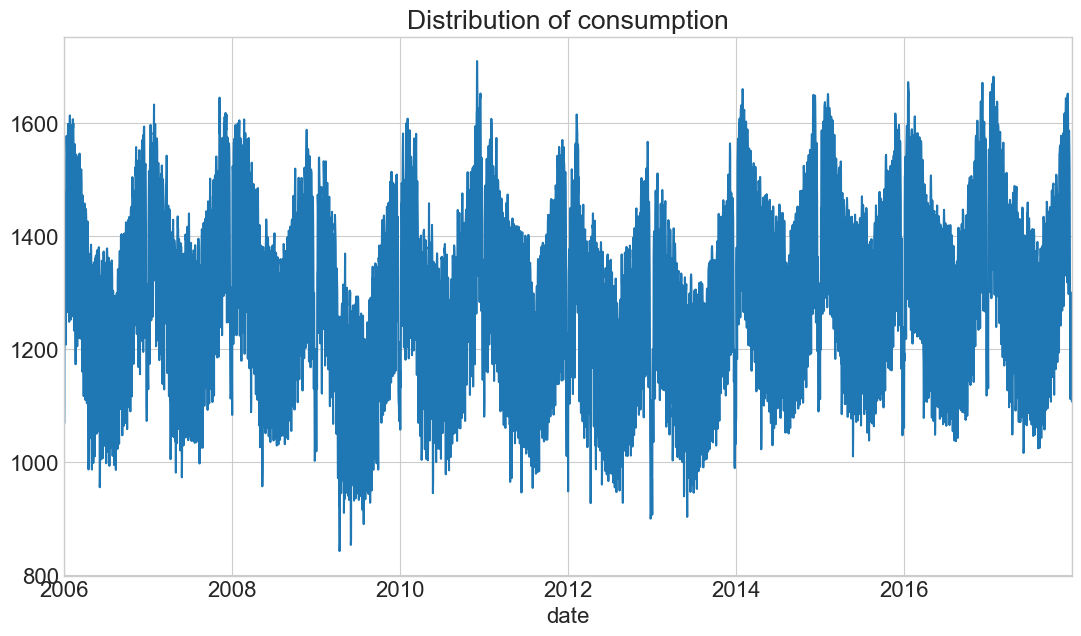

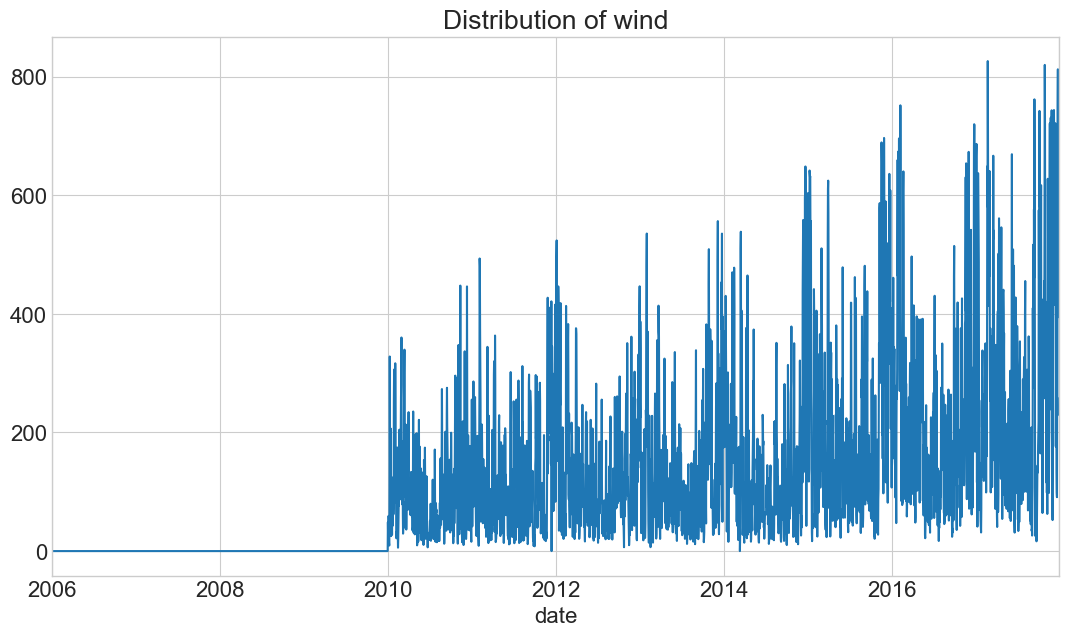

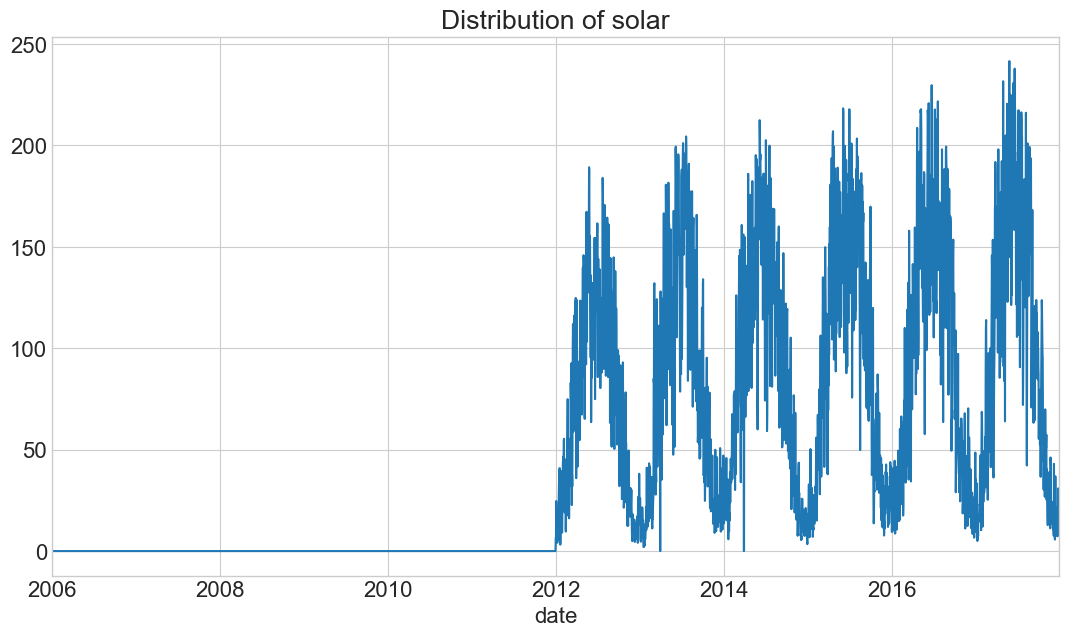

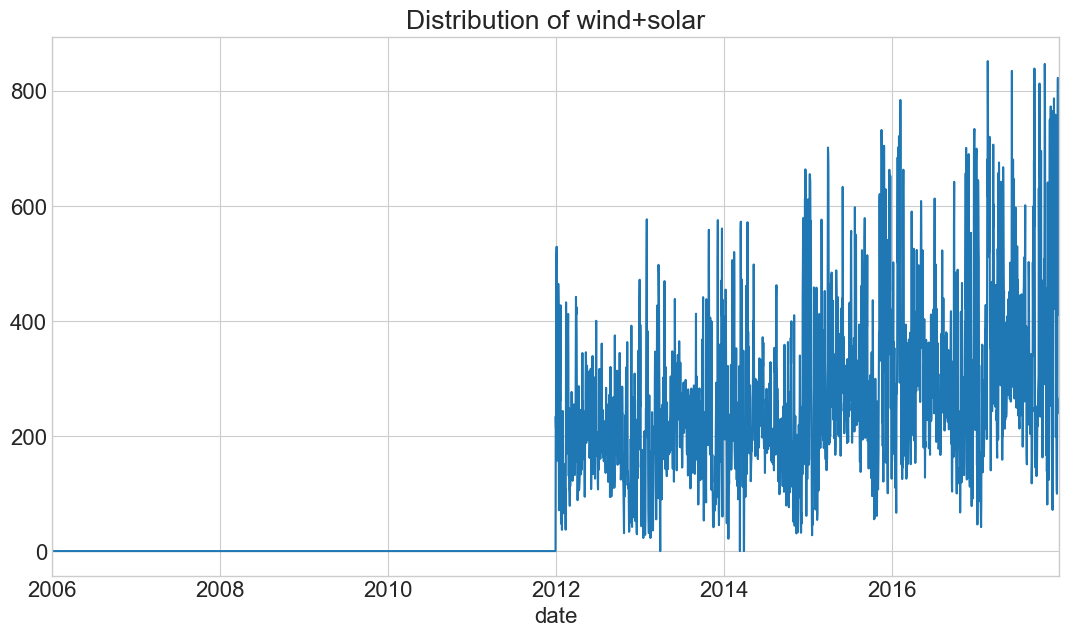

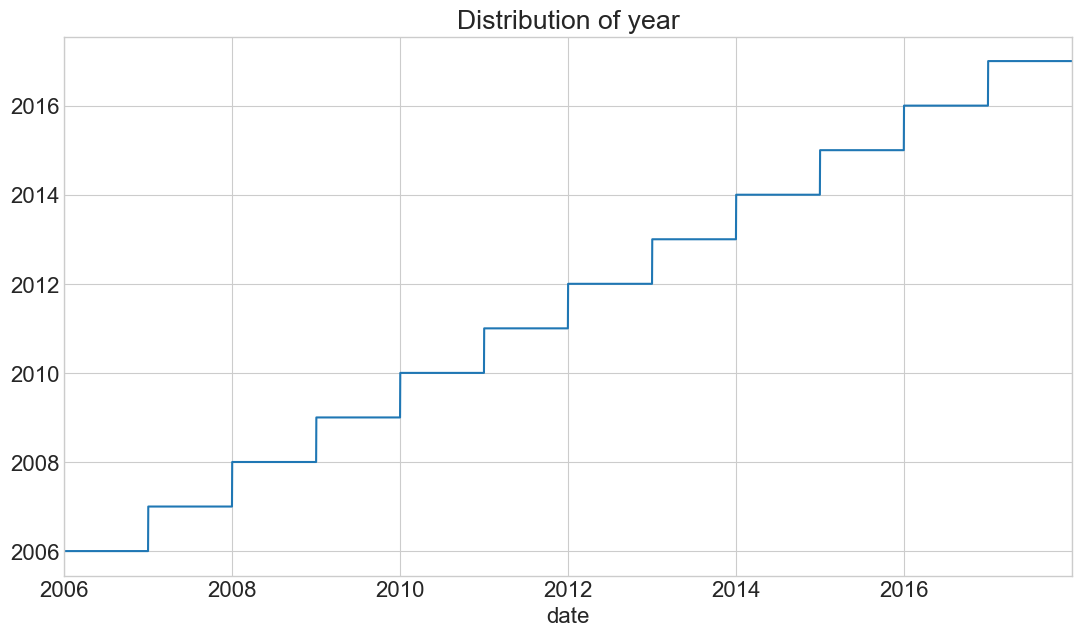

In [43]:
prepare.plot_distributions(germany2)